# Démo 03 : Intervalles de Confiance & Erreur Standard

Ce notebook illustre en détail les concepts d'erreur standard et d'intervalle de confiance,
avec des exemples visuels et concrets.

**Objectifs :**
- Comprendre l'erreur standard (SE) et son lien avec la taille de l'échantillon
- Construire et interpréter des intervalles de confiance
- Visualiser ce que signifie "95% de confiance"
- Cas pratiques : sondages, temps de réponse, contrôle qualité

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
np.random.seed(42)
print("Bibliothèques chargées avec succès !")

Bibliothèques chargées avec succès !


## 1. L'erreur standard : intuition visuelle

L'erreur standard mesure **à quel point la moyenne d'un échantillon varie**
d'un échantillon à l'autre.

**Formule :** SE = s / √n

Voyons ce qui se passe quand on augmente n.

In [ ]:
# Créer une population avec une vraie moyenne connue
population_mean = 170  # Taille moyenne en cm
population_std = 10  # Écart-type
population = np.random.normal(population_mean, population_std, size=100000)

print(f"Population : μ = {np.mean(population):.2f} cm, σ = {np.std(population):.2f} cm")
print(f"Taille de la population : N = {len(population)}")

Population : μ = 170.01 cm, σ = 10.01 cm
Taille de la population : N = 100000


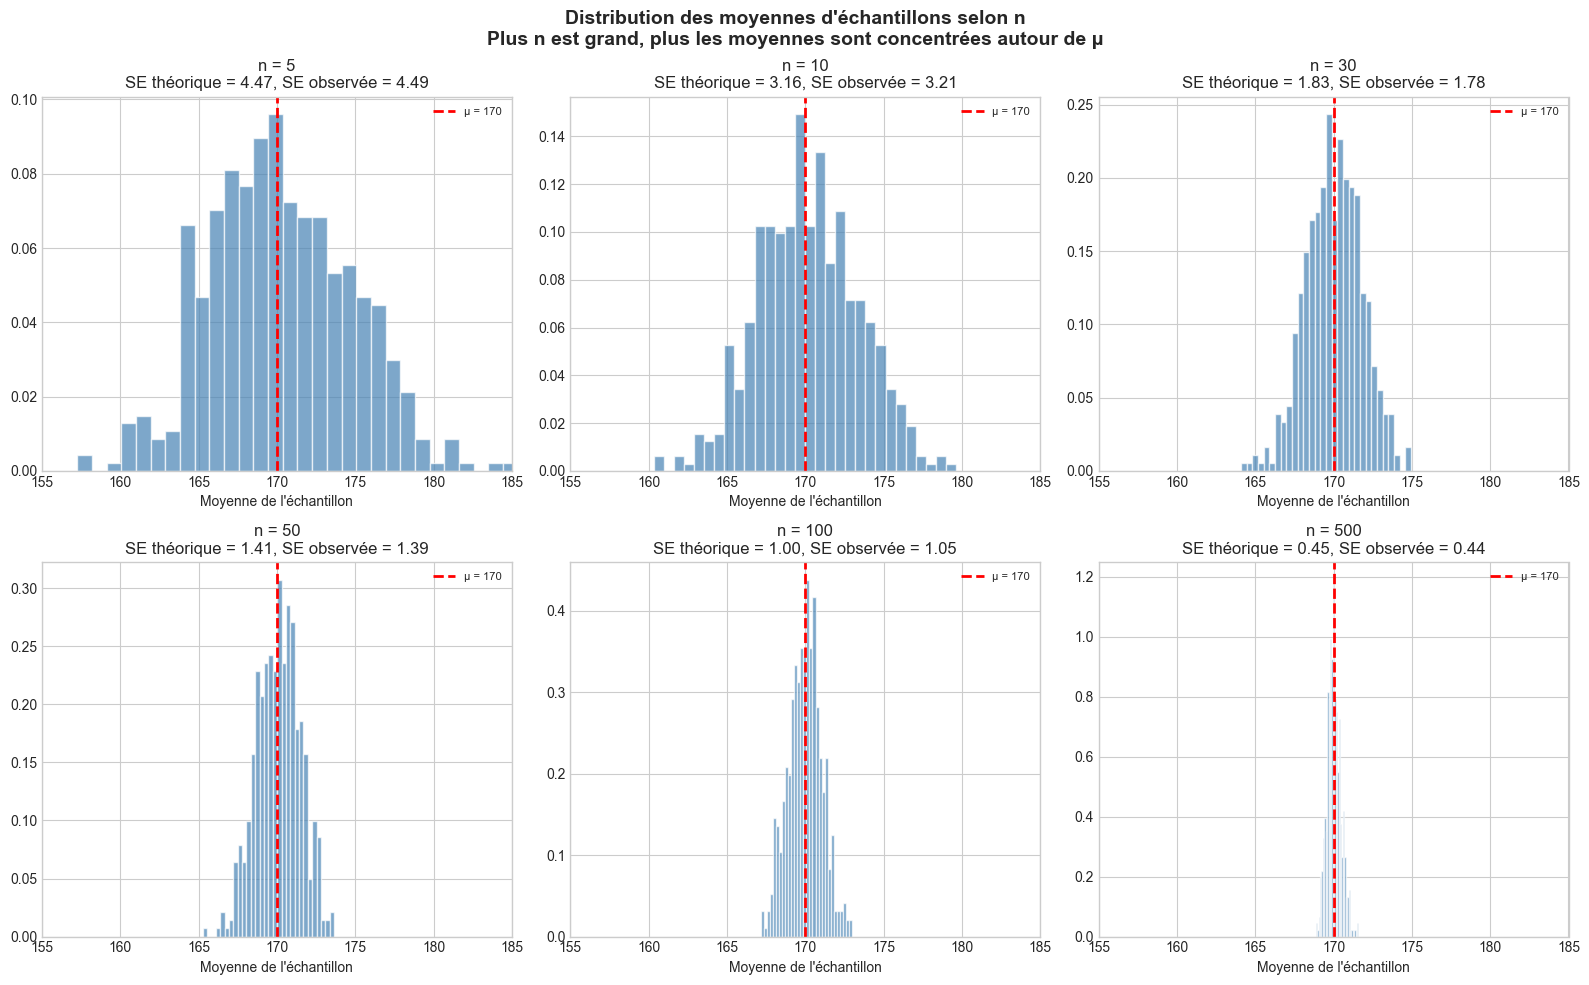

In [ ]:
# Simuler : prendre 500 échantillons pour chaque taille n
sample_sizes = [5, 10, 30, 50, 100, 500]
n_simulations = 500

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, n in enumerate(sample_sizes):
    # Tirer 500 échantillons de taille n et calculer leur moyenne
    means = [np.mean(np.random.choice(population, n)) for _ in range(n_simulations)]

    ax = axes[idx]
    ax.hist(
        means, bins=30, density=True, alpha=0.7, color="steelblue", edgecolor="white"
    )
    ax.axvline(
        population_mean,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"μ = {population_mean}",
    )

    se_theorique = population_std / np.sqrt(n)
    se_observee = np.std(means)

    ax.set_title(
        f"n = {n}\nSE théorique = {se_theorique:.2f}, SE observée = {se_observee:.2f}"
    )
    ax.set_xlabel("Moyenne de l'échantillon")
    ax.set_xlim(155, 185)
    ax.legend(fontsize=8)

plt.suptitle(
    "Distribution des moyennes d'échantillons selon n\n"
    "Plus n est grand, plus les moyennes sont concentrées autour de μ",
    fontsize=14,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

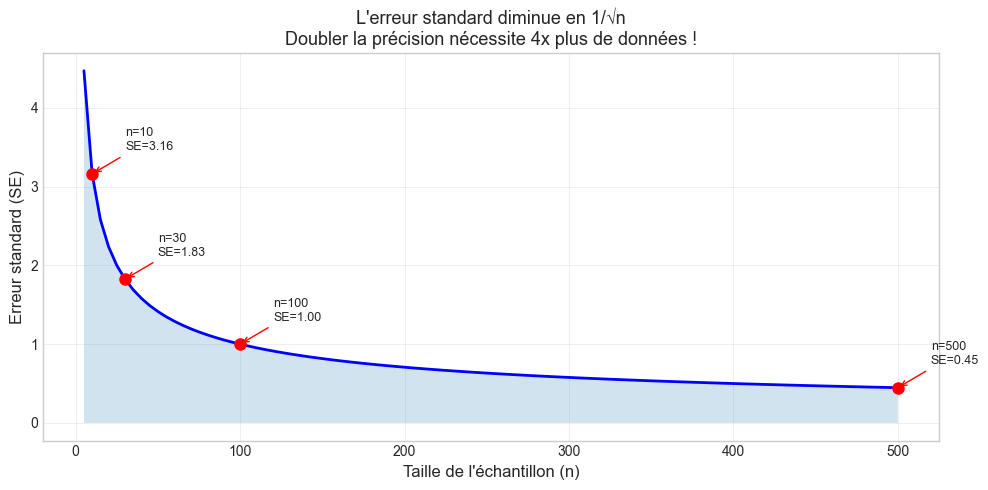

Conclusion clé :
  Pour passer de SE=2.00 (n=25) à SE=1.00 (n=100),
  il faut 4x plus de données (100 vs 25), mais on divise l'erreur par 2 seulement.


In [ ]:
# Visualiser la décroissance de l'erreur standard en fonction de n
n_values = np.arange(5, 501, 5)
se_values = population_std / np.sqrt(n_values)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(n_values, se_values, "b-", linewidth=2)
ax.fill_between(n_values, se_values, alpha=0.2)

# Marquer les points clés
for n_mark in [10, 30, 100, 500]:
    se_mark = population_std / np.sqrt(n_mark)
    ax.plot(n_mark, se_mark, "ro", markersize=8)
    ax.annotate(
        f"n={n_mark}\nSE={se_mark:.2f}",
        xy=(n_mark, se_mark),
        xytext=(n_mark + 20, se_mark + 0.3),
        fontsize=9,
        arrowprops=dict(arrowstyle="->", color="red"),
    )

ax.set_xlabel("Taille de l'échantillon (n)", fontsize=12)
ax.set_ylabel("Erreur standard (SE)", fontsize=12)
ax.set_title(
    "L'erreur standard diminue en 1/√n\n"
    "Doubler la précision nécessite 4x plus de données !",
    fontsize=13,
)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Conclusion clé :")
print(
    f"  Pour passer de SE={population_std / np.sqrt(25):.2f} (n=25) à SE={population_std / np.sqrt(100):.2f} (n=100),"
)
print(
    f"  il faut 4x plus de données (100 vs 25), mais on divise l'erreur par 2 seulement."
)

## 2. Construire un intervalle de confiance

L'IC à 95% se calcule ainsi :

**IC = x̄ ± t* × SE**

où t* est la valeur critique de la distribution t de Student.

In [ ]:
# Exemple concret : temps de réponse d'un serveur
temps_reponse = [
    120,
    135,
    128,
    142,
    131,
    125,
    138,
    129,
    144,
    133,
    127,
    136,
    130,
    141,
    126,
    139,
    132,
    128,
    137,
    134,
]

n = len(temps_reponse)
moyenne = np.mean(temps_reponse)
ecart_type = np.std(temps_reponse, ddof=1)
se = ecart_type / np.sqrt(n)

print("=== Temps de réponse du serveur (ms) ===")
print(f"n = {n}")
print(f"Moyenne (x̄) = {moyenne:.2f} ms")
print(f"Écart-type (s) = {ecart_type:.2f} ms")
print(f"Erreur standard (SE) = {se:.2f} ms")

# Calculer l'IC à 95%
confidence = 0.95
ic = stats.t.interval(confidence=confidence, df=n - 1, loc=moyenne, scale=se)

print(
    f"\nIntervalle de confiance à {confidence * 100:.0f}% : [{ic[0]:.2f}, {ic[1]:.2f}] ms"
)
print(f"Marge d'erreur : ± {(ic[1] - ic[0]) / 2:.2f} ms")

=== Temps de réponse du serveur (ms) ===
n = 20
Moyenne (x̄) = 132.75 ms
Écart-type (s) = 6.30 ms
Erreur standard (SE) = 1.41 ms

Intervalle de confiance à 95% : [129.80, 135.70] ms
Marge d'erreur : ± 2.95 ms


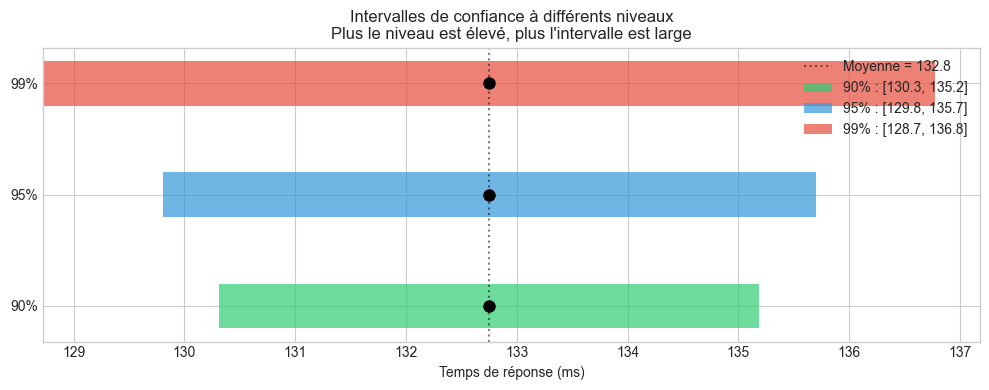

Compromis : plus on veut être 'sûr', plus l'intervalle est large (moins précis).


In [ ]:
# Comparer différents niveaux de confiance
niveaux = [0.90, 0.95, 0.99]

fig, ax = plt.subplots(figsize=(10, 4))

colors = ["#2ecc71", "#3498db", "#e74c3c"]
for i, conf in enumerate(niveaux):
    ic = stats.t.interval(confidence=conf, df=n - 1, loc=moyenne, scale=se)
    largeur = ic[1] - ic[0]
    ax.barh(
        i,
        largeur,
        left=ic[0],
        height=0.4,
        color=colors[i],
        alpha=0.7,
        label=f"{conf * 100:.0f}% : [{ic[0]:.1f}, {ic[1]:.1f}]",
    )
    ax.plot(moyenne, i, "ko", markersize=8)

ax.axvline(
    moyenne, color="black", linestyle=":", alpha=0.5, label=f"Moyenne = {moyenne:.1f}"
)
ax.set_yticks(range(len(niveaux)))
ax.set_yticklabels([f"{c * 100:.0f}%" for c in niveaux])
ax.set_xlabel("Temps de réponse (ms)")
ax.set_title(
    "Intervalles de confiance à différents niveaux\nPlus le niveau est élevé, plus l'intervalle est large"
)
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

print(
    "Compromis : plus on veut être 'sûr', plus l'intervalle est large (moins précis)."
)

## 3. Que signifie vraiment "95% de confiance" ?

On va simuler 100 échantillons et calculer un IC pour chacun.
Environ 95 des 100 IC devraient **contenir la vraie moyenne μ**.

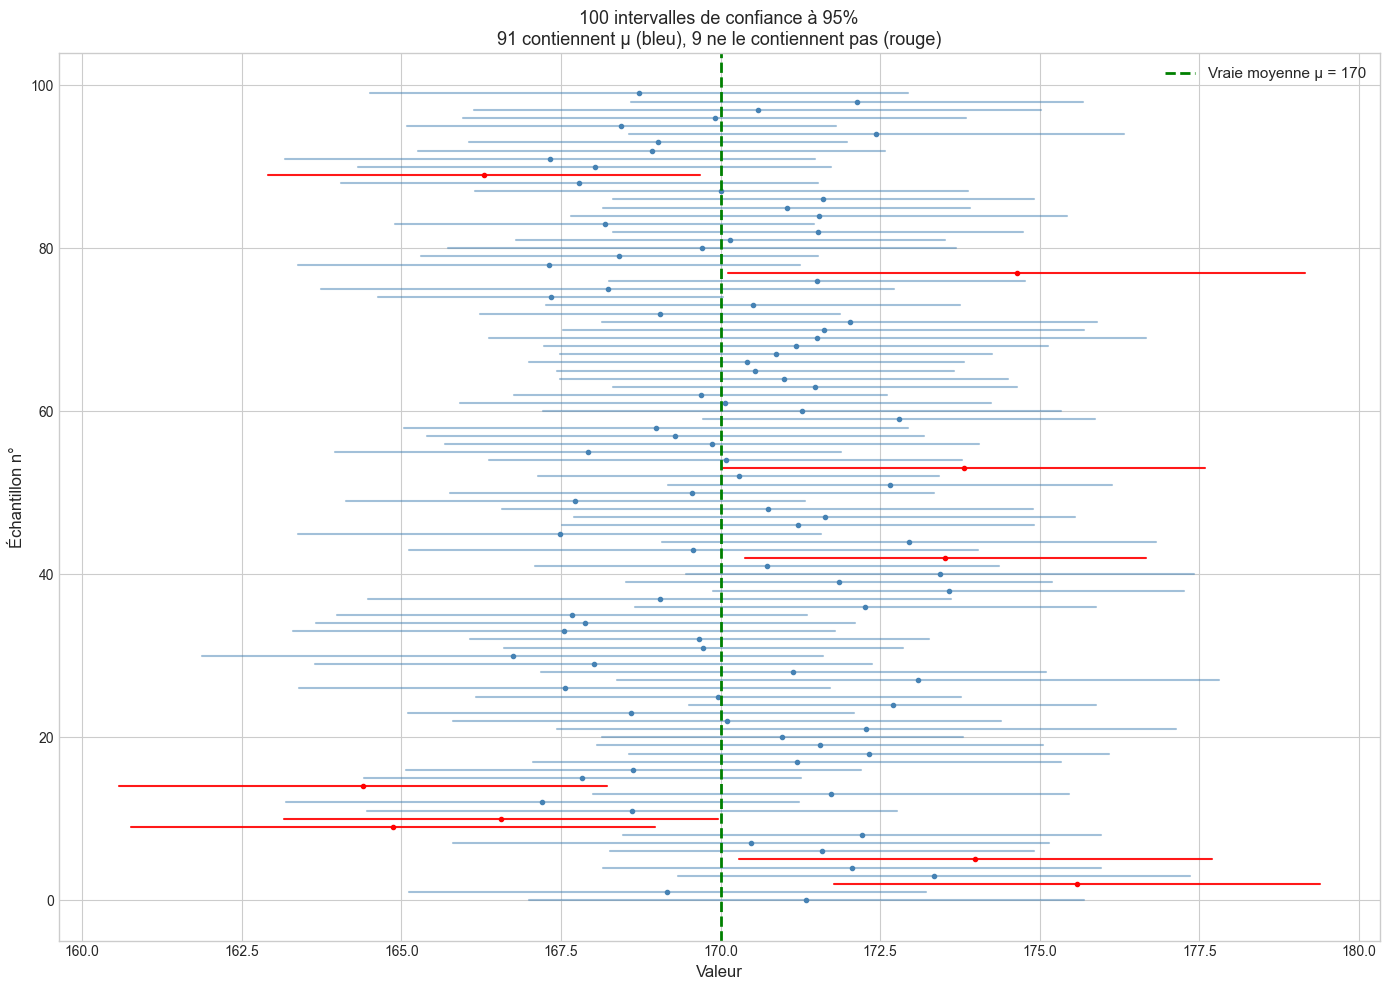


Résultat : 91/100 IC contiennent la vraie moyenne μ.
On s'attendait à environ 95/100.

C'est ÇA que signifie '95% de confiance' :
Si on répète l'expérience, 95% des IC contiendront μ.


In [ ]:
# Simulation : 100 intervalles de confiance
n_echantillons = 100
taille_echantillon = 30
confidence_level = 0.95

fig, ax = plt.subplots(figsize=(14, 10))

contient_mu = 0

for i in range(n_echantillons):
    # Tirer un échantillon
    sample = np.random.choice(population, taille_echantillon)
    m = np.mean(sample)
    s = np.std(sample, ddof=1)
    se_sample = s / np.sqrt(taille_echantillon)

    # Calculer l'IC
    ic = stats.t.interval(
        confidence=confidence_level, df=taille_echantillon - 1, loc=m, scale=se_sample
    )

    # Vérifier si l'IC contient μ
    contains = ic[0] <= population_mean <= ic[1]
    if contains:
        contient_mu += 1
        color = "steelblue"
        alpha = 0.5
    else:
        color = "red"
        alpha = 0.9

    ax.plot([ic[0], ic[1]], [i, i], color=color, alpha=alpha, linewidth=1.5)
    ax.plot(m, i, "o", color=color, markersize=3)

# Ligne de la vraie moyenne
ax.axvline(
    population_mean,
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"Vraie moyenne μ = {population_mean}",
)

ax.set_xlabel("Valeur", fontsize=12)
ax.set_ylabel("Échantillon n°", fontsize=12)
ax.set_title(
    f"{n_echantillons} intervalles de confiance à {confidence_level * 100:.0f}%\n"
    f"{contient_mu} contiennent μ (bleu), {n_echantillons - contient_mu} ne le contiennent pas (rouge)",
    fontsize=13,
)
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\nRésultat : {contient_mu}/{n_echantillons} IC contiennent la vraie moyenne μ.")
print(
    f"On s'attendait à environ {int(confidence_level * n_echantillons)}/{n_echantillons}."
)
print(f"\nC'est ÇA que signifie '95% de confiance' :")
print(f"Si on répète l'expérience, 95% des IC contiendront μ.")

## 4. Impact de la taille d'échantillon sur l'IC

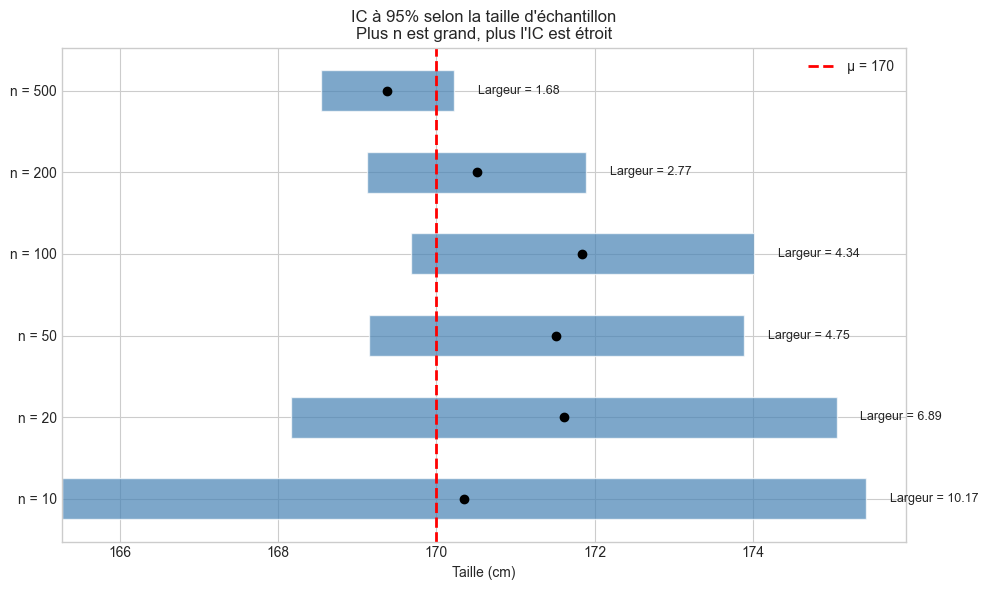

Conclusion : pour une estimation plus précise, il faut plus de données.
Mais attention : doubler la précision nécessite 4x plus de données (loi en 1/√n).


In [ ]:
# Même données de base, mais tailles d'échantillons différentes
sample_sizes_ic = [10, 20, 50, 100, 200, 500]

fig, ax = plt.subplots(figsize=(10, 6))

for idx, n in enumerate(sample_sizes_ic):
    sample = np.random.choice(population, n)
    m = np.mean(sample)
    se_sample = np.std(sample, ddof=1) / np.sqrt(n)
    ic = stats.t.interval(confidence=0.95, df=n - 1, loc=m, scale=se_sample)

    largeur = ic[1] - ic[0]
    ax.barh(
        idx,
        largeur,
        left=ic[0],
        height=0.5,
        alpha=0.7,
        color="steelblue",
        edgecolor="white",
    )
    ax.plot(m, idx, "ko", markersize=6)
    ax.text(ic[1] + 0.3, idx, f"Largeur = {largeur:.2f}", va="center", fontsize=9)

ax.axvline(
    population_mean,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"μ = {population_mean}",
)
ax.set_yticks(range(len(sample_sizes_ic)))
ax.set_yticklabels([f"n = {n}" for n in sample_sizes_ic])
ax.set_xlabel("Taille (cm)")
ax.set_title(
    "IC à 95% selon la taille d'échantillon\nPlus n est grand, plus l'IC est étroit"
)
ax.legend()
plt.tight_layout()
plt.show()

print("Conclusion : pour une estimation plus précise, il faut plus de données.")
print(
    "Mais attention : doubler la précision nécessite 4x plus de données (loi en 1/√n)."
)

## 5. Cas pratique : Sondage électoral

Un sondage interroge 1000 personnes : 52% déclarent voter pour le candidat A.
Peut-on affirmer que A est en tête ?

=== Sondage électoral ===
Échantillon : n = 1000
Proportion observée : 52.0%
Erreur standard : 1.58%
Marge d'erreur (95%) : ±3.10%
IC à 95% : [48.9%, 55.1%]

L'IC contient 50%.
On NE PEUT PAS affirmer que A est en tête. Le résultat est trop serré.


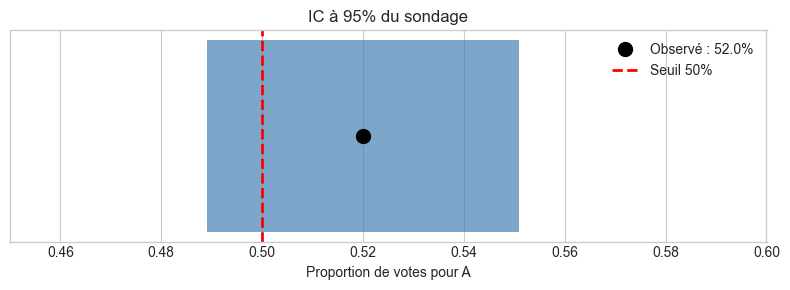

In [ ]:
# Sondage
n_sondage = 1000
p_observe = 0.52  # 52%

# Erreur standard pour une proportion : SE = sqrt(p*(1-p)/n)
se_proportion = np.sqrt(p_observe * (1 - p_observe) / n_sondage)

# IC à 95% (on utilise z car n est grand)
z_critique = stats.norm.ppf(0.975)  # 1.96
ic_bas = p_observe - z_critique * se_proportion
ic_haut = p_observe + z_critique * se_proportion

print("=== Sondage électoral ===")
print(f"Échantillon : n = {n_sondage}")
print(f"Proportion observée : {p_observe * 100:.1f}%")
print(f"Erreur standard : {se_proportion * 100:.2f}%")
print(f"Marge d'erreur (95%) : ±{z_critique * se_proportion * 100:.2f}%")
print(f"IC à 95% : [{ic_bas * 100:.1f}%, {ic_haut * 100:.1f}%]")
print()

if ic_bas > 0.50:
    print("L'IC est entièrement au-dessus de 50%.")
    print("On peut affirmer (avec 95% de confiance) que A est en tête.")
else:
    print("L'IC contient 50%.")
    print("On NE PEUT PAS affirmer que A est en tête. Le résultat est trop serré.")

# Visualisation
fig, ax = plt.subplots(figsize=(8, 3))
ax.barh(0, ic_haut - ic_bas, left=ic_bas, height=0.3, color="steelblue", alpha=0.7)
ax.plot(p_observe, 0, "ko", markersize=10, label=f"Observé : {p_observe * 100}%")
ax.axvline(0.50, color="red", linestyle="--", linewidth=2, label="Seuil 50%")
ax.set_xlim(0.45, 0.60)
ax.set_xlabel("Proportion de votes pour A")
ax.set_title("IC à 95% du sondage")
ax.legend()
ax.set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# Combien de personnes faudrait-il sonder pour que l'IC soit au-dessus de 50% ?
# On cherche n tel que p - z*sqrt(p*(1-p)/n) > 0.50
# Soit n > (z / (p - 0.50))^2 * p * (1-p)

p = 0.52
n_necessaire = (z_critique / (p - 0.50)) ** 2 * p * (1 - p)

print(f"Pour affirmer que A est en tête avec p = {p * 100}% :")
print(f"Il faudrait sonder au moins n = {int(np.ceil(n_necessaire))} personnes.")
print(f"\nAvec seulement n = {n_sondage}, la marge d'erreur est trop grande.")

Pour affirmer que A est en tête avec p = 52.0% :
Il faudrait sonder au moins n = 2398 personnes.

Avec seulement n = 1000, la marge d'erreur est trop grande.


## Résumé

| Concept | Formule | À retenir |
|---------|---------|----------|
| Erreur standard | SE = s / √n | Diminue avec n |
| IC 95% (t) | x̄ ± t* × SE | 95 IC sur 100 contiennent μ |
| IC 95% (proportion) | p ± 1.96 × √(p(1-p)/n) | Pour les pourcentages |
| Largeur IC | Dépend de n et σ | Plus n grand = IC plus étroit |

**Points clés :**
1. L'IC n'est PAS "95% de chances que μ soit dedans" (μ est fixe !)
2. C'est la **procédure** qui a 95% de chances de capturer μ
3. Pour un IC 2x plus étroit, il faut 4x plus de données
4. Toujours rapporter l'IC avec la moyenne ponctuelle